# Multiple Linear Regression in Statsmodels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on our Boston Housing Data set!

## Objectives
You will be able to:
* Run linear regression on Boston Housing dataset with all the predictors
* Interpret the parameters of the multiple linear regression model

## The Boston Housing Data

We pre-processed the Boston Housing Data again. This time, however, we did things slightly different:
- We dropped "ZN" and "NOX" completely
- We categorized "RAD" in 3 bins and "TAX" in 4 bins
- We used min-max-scaling on "B", "CRIM" and "DIS" (and logtransformed all of them first, except "B")
- We used standardization on "AGE", "INDUS", "LSTAT" and "PTRATIO" (and logtransformed all of them first, except for "AGE") 

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_features = boston_features.drop(["NOX","ZN"],axis=1)

# first, create bins for based on the values observed. 3 values will result in 2 bins
bins = [0,6,  24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for based on the values observed. 4 values will result in 3 bins
bins = [0, 270, 360, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
CRIM       506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(11)
memory usage: 43.6 KB
None


In [3]:
age = boston_features["AGE"]
b = boston_features["B"]
logcrim = np.log(boston_features["CRIM"])
logdis = np.log(boston_features["DIS"])
logindus = np.log(boston_features["INDUS"])
loglstat = np.log(boston_features["LSTAT"])
logptratio = np.log(boston_features["PTRATIO"])

# minmax scaling
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["CRIM"] = (logcrim-min(logcrim))/(max(logcrim)-min(logcrim))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

#standardization
boston_features["AGE"] = (age-np.mean(age))/np.sqrt(np.var(age))
boston_features["INDUS"] = (logindus-np.mean(logindus))/np.sqrt(np.var(logindus))
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))
boston_features["PTRATIO"] = (logptratio-np.mean(logptratio))/(np.sqrt(np.var(logptratio)))

In [4]:
boston_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM              506 non-null float64
INDUS             506 non-null float64
CHAS              506 non-null float64
RM                506 non-null float64
AGE               506 non-null float64
DIS               506 non-null float64
PTRATIO           506 non-null float64
B                 506 non-null float64
LSTAT             506 non-null float64
RAD_(0, 6]        506 non-null uint8
RAD_(6, 24]       506 non-null uint8
TAX_(0, 270]      506 non-null uint8
TAX_(270, 360]    506 non-null uint8
TAX_(360, 712]    506 non-null uint8
dtypes: float64(9), uint8(5)
memory usage: 38.1 KB


## Run an linear model in Statsmodels



## Run the same model in Scikit-learn

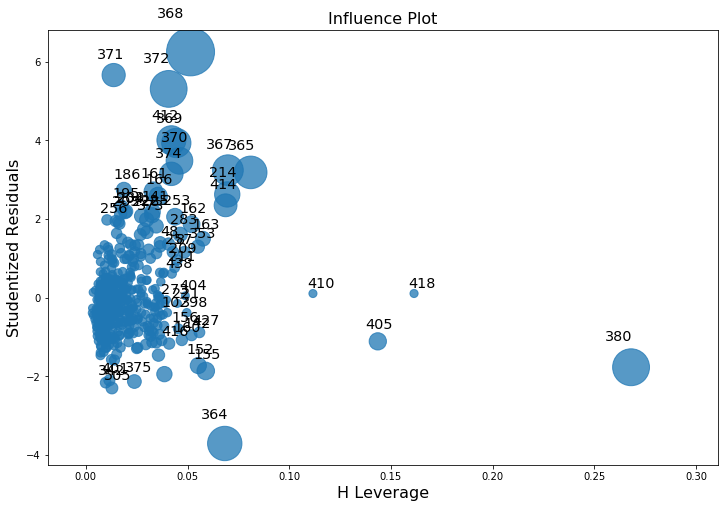

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 

boston_targets = pd.DataFrame(boston.target, columns = ['MEDV'])
data_ols = pd.concat([boston_features, boston_targets], axis=1)

outcome = 'MEDV'
predictors = '+'.join(boston_features.drop([c for c in data_ols.columns if '_' in c], axis=1))
formula = outcome + '~' + predictors

model = ols(formula=formula, data=data_ols).fit()
model.summary()

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")

## Remove the necessary variables to make sure the coefficients are the same for Scikit-learn vs Statsmodels

### Statsmodels

### Scikit-learn

## Interpret the coefficients for PTRATIO, PTRATIO, LSTAT

- CRIM: per capita crime rate by town
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population

## Predict the house price given the following characteristics (before manipulation!!)

Make sure to transform your variables as needed!

- CRIM: 0.15
- INDUS: 6.07
- CHAS: 1        
- RM:  6.1
- AGE: 33.2
- DIS: 7.6
- PTRATIO: 17
- B: 383
- LSTAT: 10.87
- RAD: 8
- TAX: 284

## Summary
Congratulations! You've fitted your first multiple linear regression model on the Boston Housing Data.